In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
#import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True,cutoff=50):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

In [3]:
data = load_dataset('synth_data/synth_unimodal.csv',Nmax=500,cutoff=-1)
th_gt = params2theta(*torch.tensor((8000,500,1.)))


In [4]:
data.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()

tensor(-1655.5844, device='cuda:0', dtype=torch.float64)

In [5]:
data.evaluate(tol=1e-5,components=1)

3.3887283207378287 -1665.3074014496378 -24.990815583020087
3.3614817821551997 -1658.554361293452 -23.4373174774682
3.353710598399488 -1654.6887204265813 -22.147036527843383
3.3527236410050234 -1654.8466528366757 -21.242353649205544
3.352473444226542 -1655.0411549029693 -21.153238489778417
3.351966624371643 -1654.5780840489247 -21.437993771623034
3.3519117854288236 -1654.5528514383045 -21.410844245308002
3.351879536738885 -1654.6405956136018 -21.303689212895648
3.351869107268922 -1654.594596543067 -21.33982119636113


(tensor([8074.0333], device='cuda:0', dtype=torch.float64),
 tensor([450.6955], device='cuda:0', dtype=torch.float64),
 tensor([1.], device='cuda:0', dtype=torch.float64))

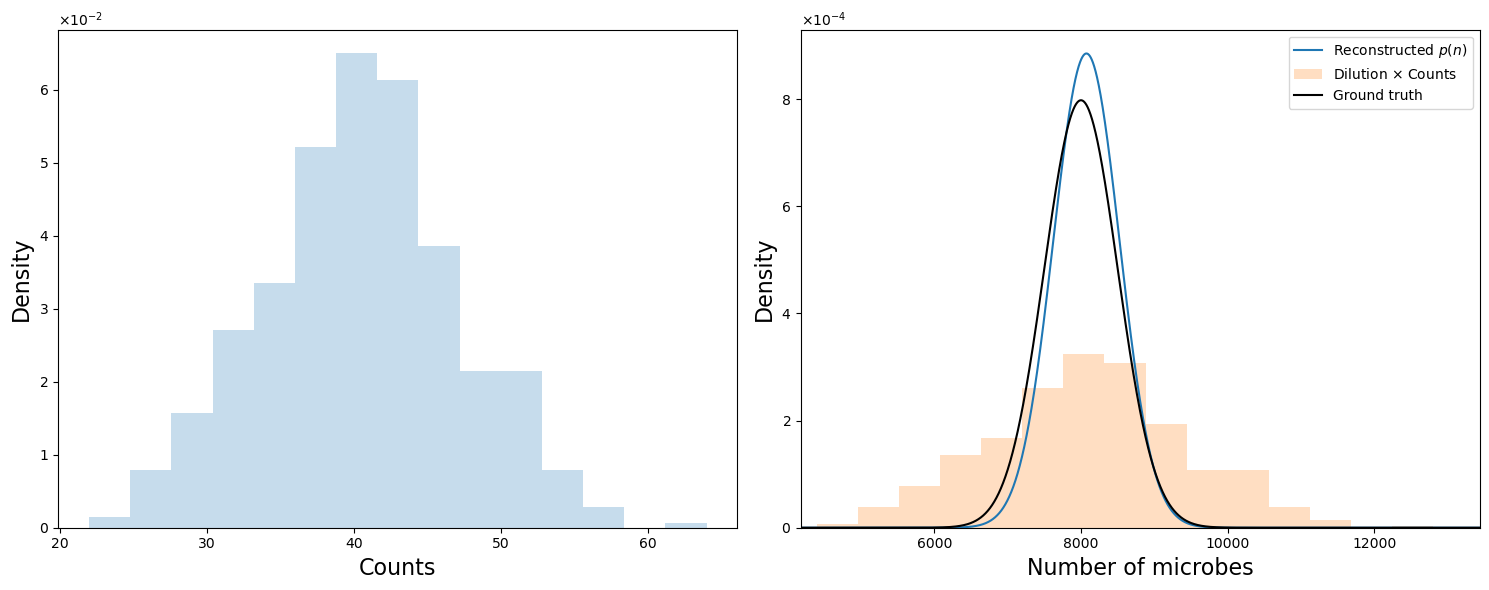

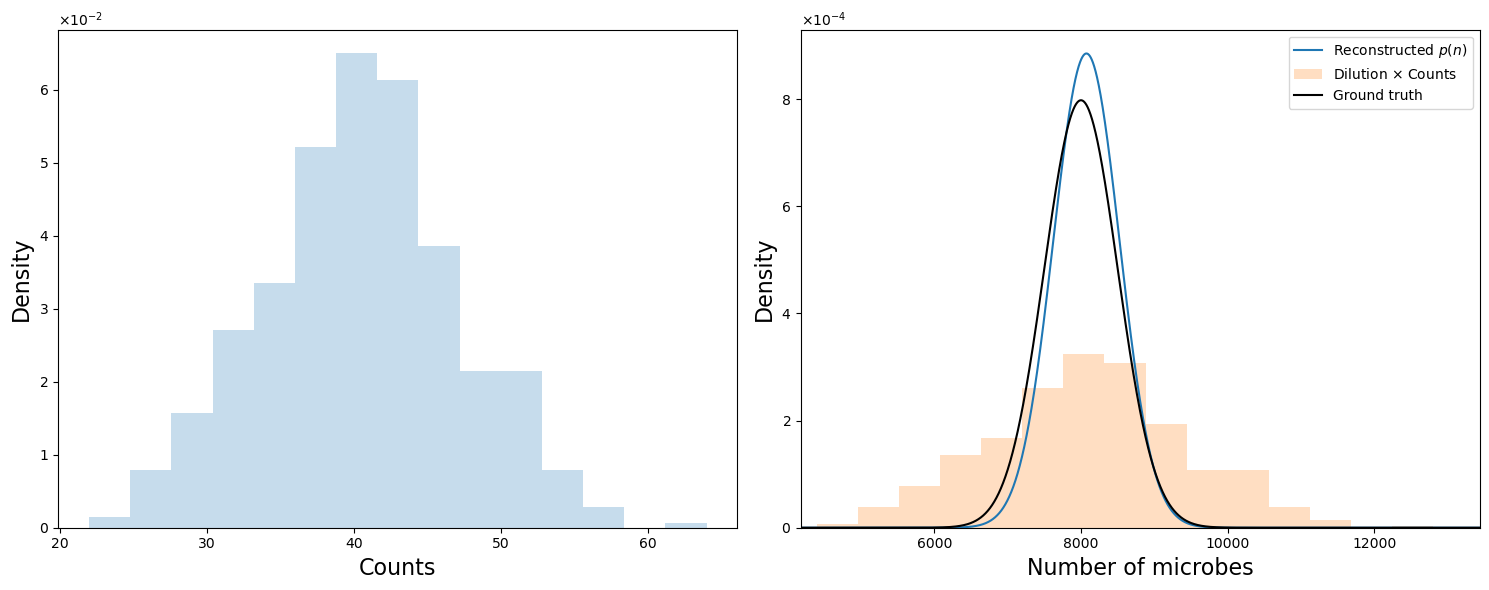

In [6]:
data.make_plot('graphs/synth/unimodal_{}.png'.format(th_gt.numpy()),th_gt)

In [7]:
data2 = load_dataset('synth_data/synth_multimodal.csv',Nmax=1000,cutoff=-1)
th_gt = params2theta(*torch.tensor(((4000,8000,14000),
                                   (200,1500,1000),
                                   (.25,.4,.35))))


In [8]:
data2.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()

tensor(-4335.3454, device='cuda:0', dtype=torch.float64)

In [9]:
data2.evaluate(tol=1e-5)

4.891569354149253 -4333.3954309326255 -552.1466182357797
4.838267421325861 -4332.5863328601845 -501.3264883180858
4.802318100913558 -4332.836214430517 -466.80955988087806
4.779868519403345 -4333.216597262087 -445.02467116752206
4.767019858531609 -4333.977572958427 -432.08568823581584
4.759664955342923 -4334.331444963056 -424.86635206362064
4.757272651538441 -4335.887408921408 -421.24378026732865
4.756139055030074 -4335.342693669616 -420.7295172273712


(tensor([13949.0778,  8068.7732,  4077.5122, 13784.8623,  7940.7640, 13618.0517,
          7997.1877,  7795.8473,  4110.9865, 12821.2302,  4112.1708,  4091.4081,
          6836.2992,  9667.4500,  4055.4039,  4040.1466,  3981.9328,  3864.1359,
          3697.8561,  2912.5214,  5178.8380,  3165.8679,  2778.8612,  4317.0245],
        device='cuda:0', dtype=torch.float64),
 tensor([ 994.5997,  988.6675,  353.9001, 1267.6833, 1044.8486, 1321.6424,
         1274.8470, 1245.0150,  548.8338, 1811.8803,  612.3790,  667.3769,
         1688.6336, 2491.9456,  729.8925,  788.0956,  806.8506,  795.1540,
          791.0693,  719.6798, 1720.6038,  812.7924,  683.4547, 1531.4628],
        device='cuda:0', dtype=torch.float64),
 tensor([0.1268, 0.1159, 0.1119, 0.0929, 0.0918, 0.0831, 0.0623, 0.0483, 0.0459,
         0.0407, 0.0348, 0.0254, 0.0243, 0.0237, 0.0172, 0.0142, 0.0119, 0.0092,
         0.0062, 0.0032, 0.0030, 0.0029, 0.0025, 0.0021], device='cuda:0',
        dtype=torch.float64))

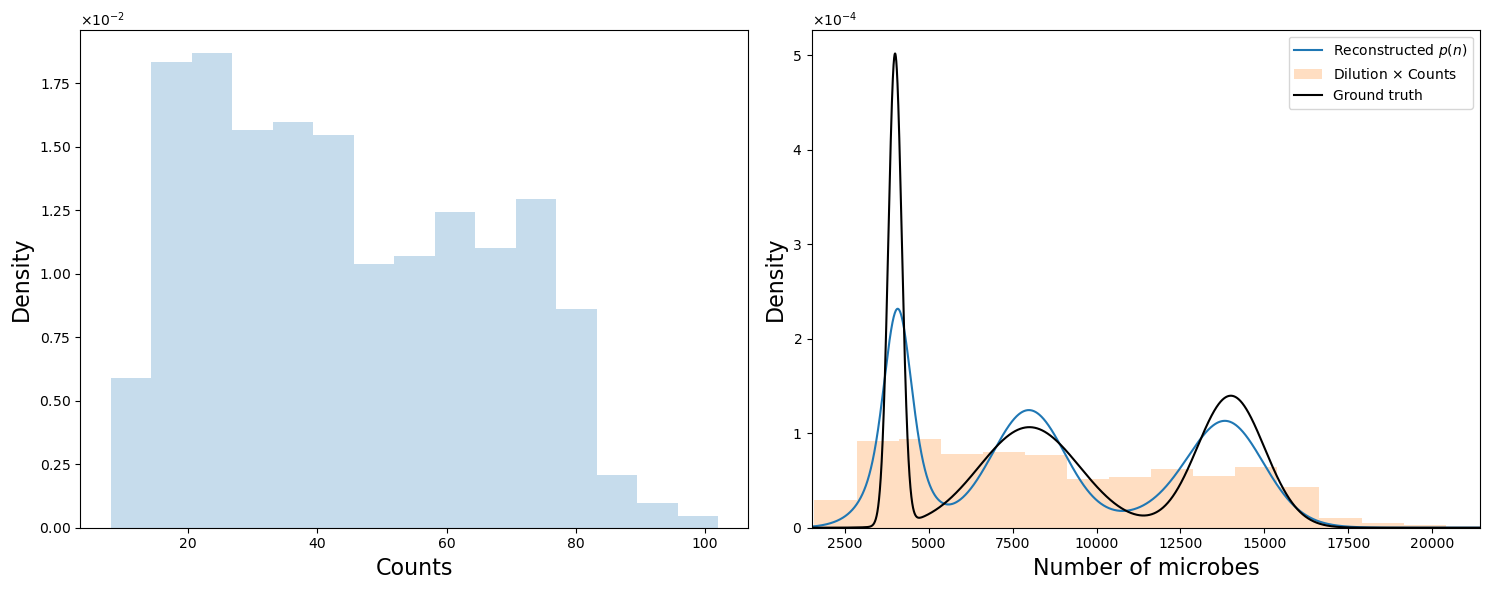

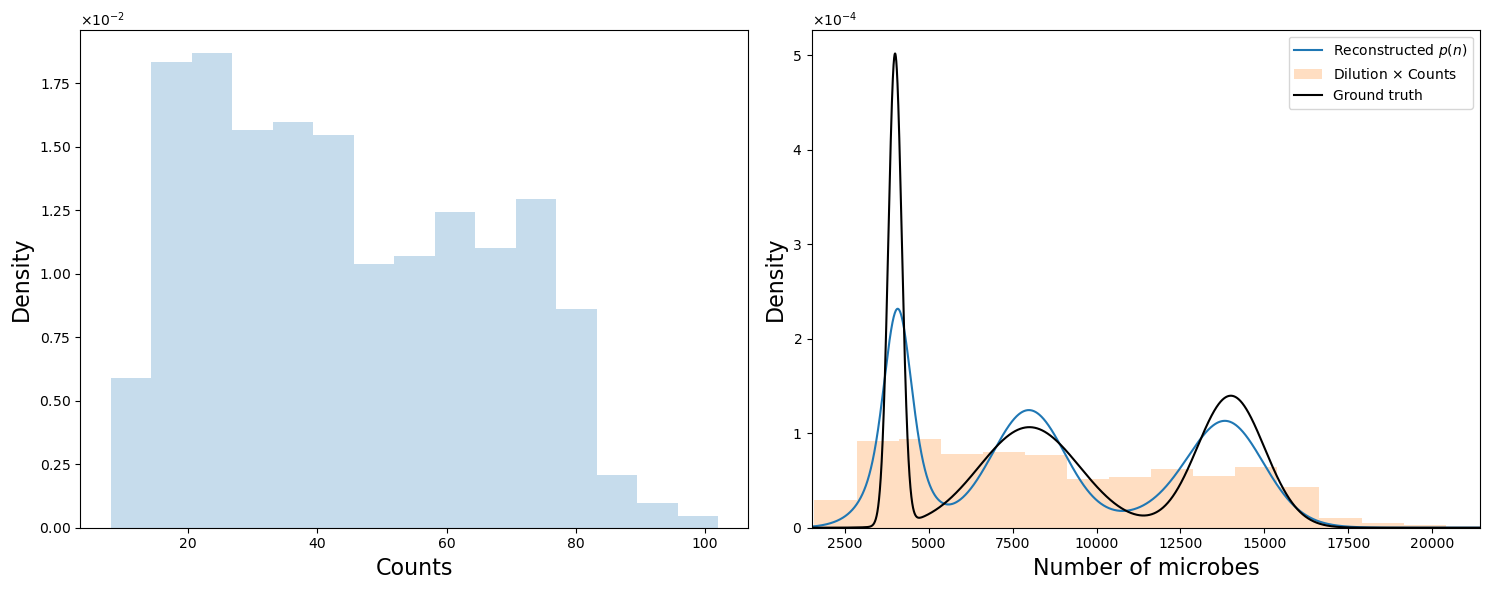

In [10]:
data2.make_plot('graphs/synth/multimodal_{}.png'.format(th_gt.numpy()),th_gt)

In [11]:
data2.ev

(tensor([13949.0778,  8068.7732,  4077.5122, 13784.8623,  7940.7640, 13618.0517,
          7997.1877,  7795.8473,  4110.9865, 12821.2302,  4112.1708,  4091.4081,
          6836.2992,  9667.4500,  4055.4039,  4040.1466,  3981.9328,  3864.1359,
          3697.8561,  2912.5214,  5178.8380,  3165.8679,  2778.8612,  4317.0245],
        device='cuda:0', dtype=torch.float64),
 tensor([ 994.5997,  988.6675,  353.9001, 1267.6833, 1044.8486, 1321.6424,
         1274.8470, 1245.0150,  548.8338, 1811.8803,  612.3790,  667.3769,
         1688.6336, 2491.9456,  729.8925,  788.0956,  806.8506,  795.1540,
          791.0693,  719.6798, 1720.6038,  812.7924,  683.4547, 1531.4628],
        device='cuda:0', dtype=torch.float64),
 tensor([0.1268, 0.1159, 0.1119, 0.0929, 0.0918, 0.0831, 0.0623, 0.0483, 0.0459,
         0.0407, 0.0348, 0.0254, 0.0243, 0.0237, 0.0172, 0.0142, 0.0119, 0.0092,
         0.0062, 0.0032, 0.0030, 0.0029, 0.0025, 0.0021], device='cuda:0',
        dtype=torch.float64))

In [12]:
data2.alpha/data2.alpha.sum()

tensor([0.1077, 0.0970, 0.0873, 0.0785, 0.0707, 0.0636, 0.0573, 0.0515, 0.0464,
        0.0417, 0.0376, 0.0338, 0.0304, 0.0274, 0.0246, 0.0222, 0.0200, 0.0180,
        0.0162, 0.0146, 0.0131, 0.0118, 0.0106, 0.0095, 0.0086])